## ANALYSIS UNEMPLOYMENT WITH PYTHON
Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt


In [40]:
# Load the dataset
df = pd.read_csv("Unemployment in India.csv")

In [41]:
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()


In [42]:
# Check for and remove any null values
df = df.dropna()


### Analyzing The Data

In [43]:
# Inspect the dataset's structure and types
print("Dataset shape:", df.shape)
print("Dataset size:", df.size)
print("Columns:", df.columns)
print("Data types:\n", df.dtypes)
df.info()


Dataset shape: (740, 7)
Dataset size: 5180
Columns: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Data types:
 Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2

In [44]:
# Check for duplicate rows
print("Duplicate records:", df.duplicated().sum())


Duplicate records: 0


In [45]:

# Descriptive statistics
print(df.describe())


       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


In [46]:
# Value counts for categorical columns
print("Region counts:\n", df['Region'].value_counts())
print("Date counts:\n", df['Date'].value_counts())
print("Area counts:\n", df['Area'].value_counts())

Region counts:
 Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64
Date counts:
 Date
31-10-2019    55
30-11-2019    55
31-05-2019    54
30-06-2019    54
31-07-2019    54
31-08-2019    53
31-12-2019    53
31-01-2020    53
29-02-2020    53
30-09-2019    52
31-03-2020    52
30-04-2020    51
31-05-2020    51
30-06-2020    50
Name: count, dtype: int64
Area counts:
 Area
Urban

In [47]:
# Extract day, month, and year from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year


In [48]:

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")



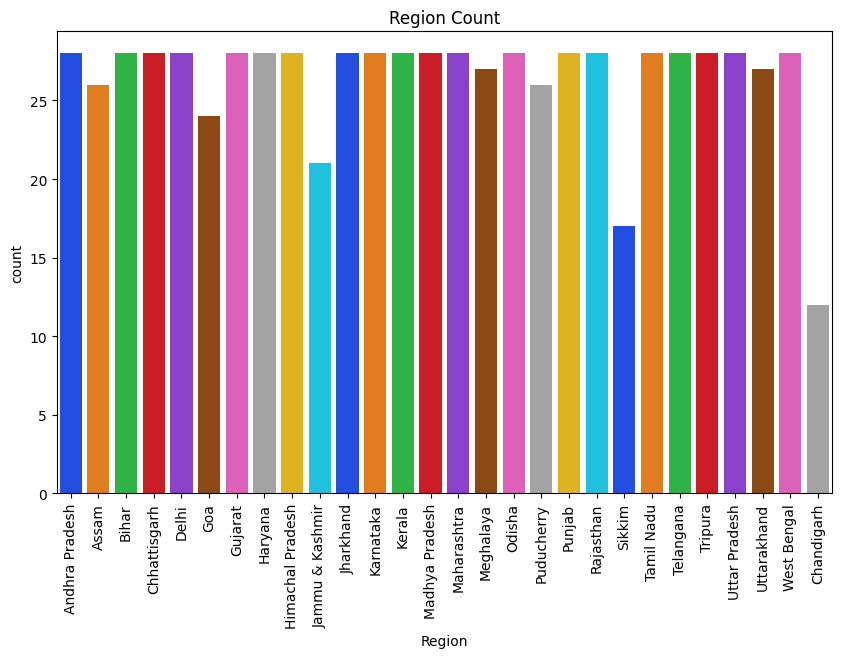

In [49]:
# Region count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df, palette='bright')
plt.xticks(rotation='vertical')
plt.title('Region Count')
plt.show()

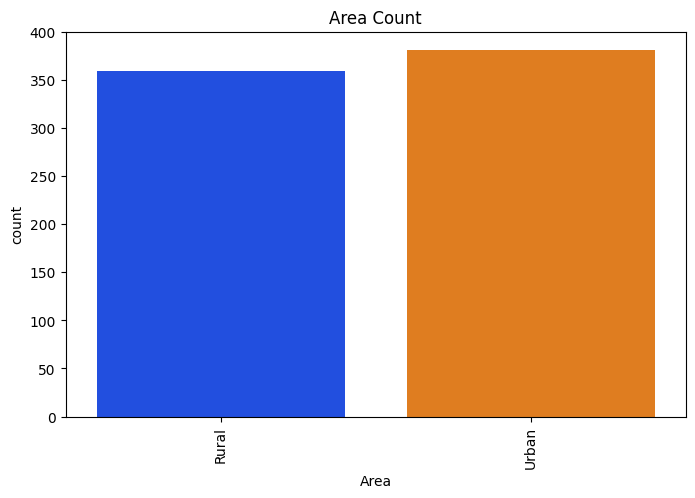

In [50]:
# Area count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Area', data=df, palette='bright')
plt.xticks(rotation='vertical')
plt.title('Area Count')
plt.show()


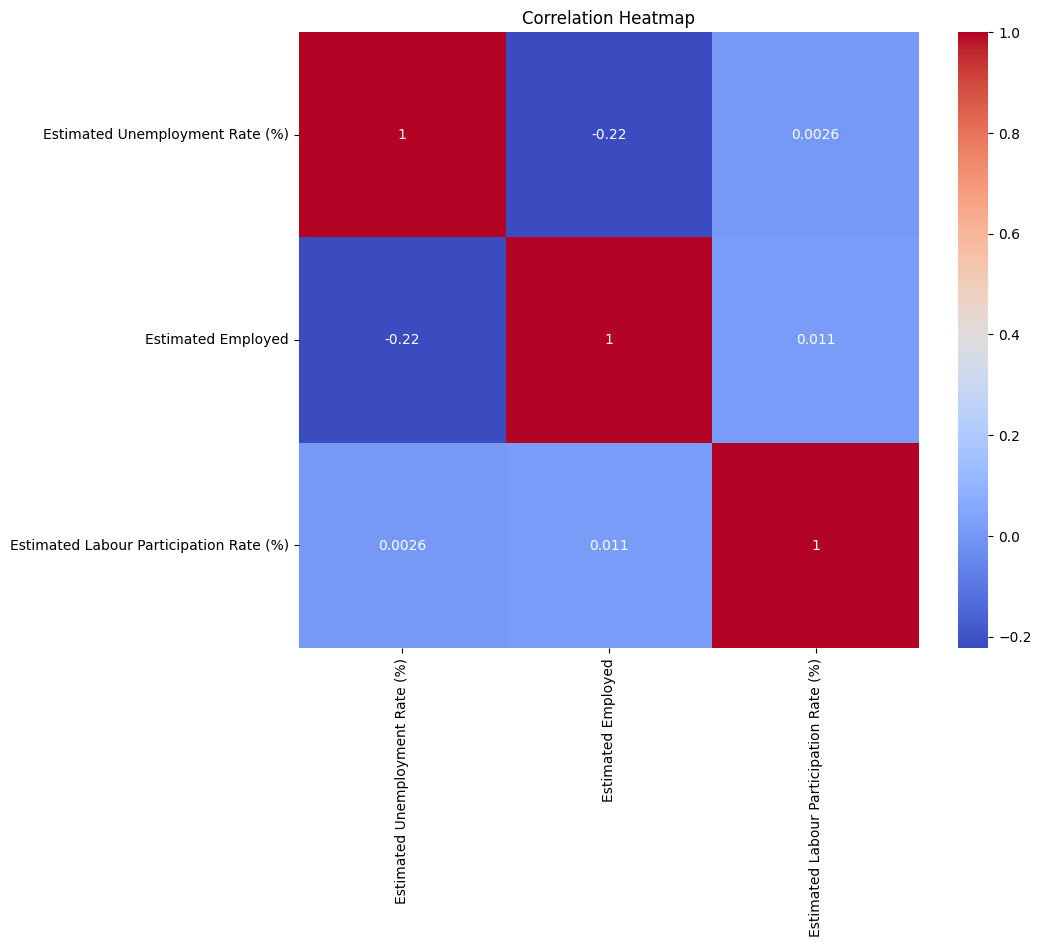

In [51]:

# Correlation heatmap for specific columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [52]:
# Sunburst plot for unemployment rate
unemployment_data = df[["Area", "Region", "Estimated Unemployment Rate (%)"]]
fig = px.sunburst(unemployment_data, path=["Area", "Region"], values="Estimated Unemployment Rate (%)", title="Unemployment Rate by Area and Region")
fig.show()

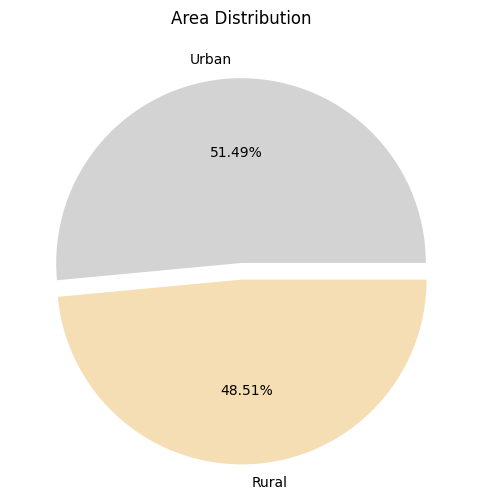

In [53]:
# Pie chart for Area distribution
plt.figure(figsize=(8, 6))
plt.pie(df['Area'].value_counts(), labels=['Urban', 'Rural'], autopct='%0.2f%%', explode=[0, 0.09], colors=['#d3d3d3', '#f5deb3'])
plt.title('Area Distribution')
plt.show()


### Adding Extra Columns To The Dataframe

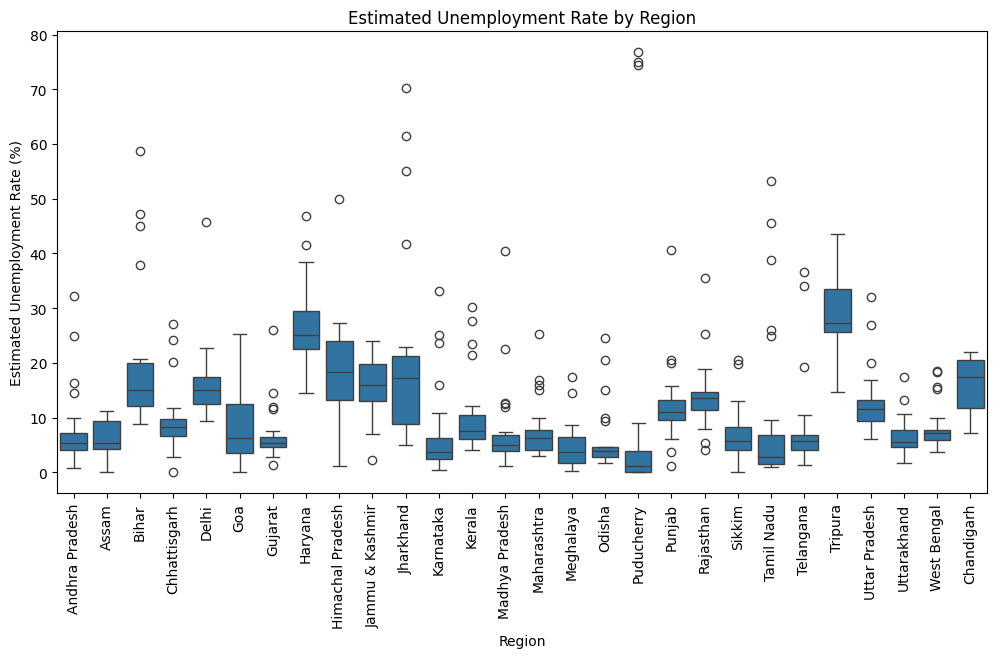

In [54]:
# Box plot of Estimated Unemployment Rate by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation='vertical')
plt.title('Estimated Unemployment Rate by Region')
plt.show()

In [55]:
# Bar plot of Average Estimated Unemployment Rate
fig = px.bar(df, x='Region', y='Estimated Unemployment Rate (%)', color='Region', title='Average Unemployment Rate')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [56]:
# Bar plot of Estimated Employed people by Month
fig = px.bar(df, x='Month', y='Estimated Employed', color='Month', title='Estimated Employed People by Month')
fig.show()

### Conclusion
- In this task, I use India's Unemployee Analysis dataset. And carried out many analyses using Python.
- I analysed the data using pandas and numpy to draw conclusions.
- I have done several data visualizations and animations using Seaborn, Matplotlib, and Plotly.
- It provides a thorough picture of the unemployment situation across states, aiding in making wise decisions.